In [45]:
import pandas as pd
df = pd.read_csv('data/train.csv')

In [46]:
cols_to_drop = ['year', 'house.color', 'zip.code']
df = df.drop(cols_to_drop, axis=1)

In [47]:
df.head()

,id,cancel,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,1,0,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,2,0,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,3,0,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,4,0,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,5,0,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [48]:
df.isnull().sum()

id                      0
cancel                  0
ni.age               1002
len.at.res            967
credit                907
coverage.type         980
dwelling.type         993
premium               957
sales.channel        1025
ni.gender             960
ni.marital.status     994
n.adults              931
n.children            938
tenure                980
claim.ind             986
dtype: int64

In [49]:
df = df.dropna()

In [50]:
print(df.shape)

(1036030, 15)


In [51]:
df.isnull().sum()

id                   0
cancel               0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
dtype: int64

count    1.036030e+06
mean     4.356381e+01
std      1.236684e+01
min      1.800000e+01
25%      3.500000e+01
50%      4.300000e+01
75%      5.100000e+01
max      4.024009e+02
Name: ni.age, dtype: float64

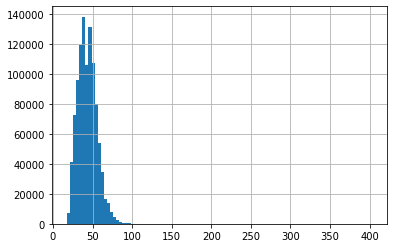

In [52]:
df['ni.age'].hist(bins=100)
df['ni.age'].describe()

In [53]:
df = df[df['ni.age'] <= 80]    

In [54]:
print(df.shape)

(1030568, 15)


In [55]:
df = df[df['n.adults'] <= 7]

In [56]:
print(df.shape)

(1029392, 15)


In [57]:
df['premium'].describe()

count    1.029392e+06
mean     8.999049e+02
std      7.770871e+01
min      6.123895e+02
25%      8.439558e+02
50%      8.997217e+02
75%      9.554010e+02
max      1.243311e+03
Name: premium, dtype: float64

In [58]:
df['len.at.res'].describe()

count    1.029392e+06
mean     1.521613e+01
std      4.566651e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      1.800000e+01
max      4.999854e+01
Name: len.at.res, dtype: float64

In [64]:
df['ni.gender'] = df['ni.gender'].replace({'F':0, 'M':1})
df['sales.channel'] = df['sales.channel'].replace({'Broker':0, 'Phone':1, 'Online':2})
df['coverage.type'] = df['coverage.type'].replace({'C':2, 'A':0, 'B':1})
df['dwelling.type'] = df['dwelling.type'].replace({'Tenant':0, 'Condo':1, 'House':2, 'Landlord':3})
df['credit'] = df['credit'].replace({'high':0, 'medium':1, 'low':2})

In [65]:
df.head()

,id,cancel,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,1,0,37.0,18.000000,0,2,0,950.507336,0,0,0.0,2.0,0.0,15.0,0.0
1,2,0,40.0,17.000000,1,0,1,909.346046,0,0,1.0,5.0,0.0,15.0,0.0
2,3,0,45.0,14.000000,0,0,2,897.084502,1,1,0.0,1.0,0.0,14.0,0.0
3,4,0,45.0,24.366136,0,0,2,979.039007,1,1,0.0,5.0,0.0,22.0,1.0
4,5,0,36.0,16.000000,0,2,2,932.379027,0,1,1.0,2.0,4.0,4.0,0.0


In [66]:
df.to_csv('data/train_data_for_random_forest.csv', index=False)